In [1]:
!pip install tensorflow keras numpy mnist matplotlib
 # 导入数据包
import numpy as np
import mnist  # 获得数据集
import matplotlib.pyplot as plt  # Graph
from keras.models import Sequential  # ANN 网络结构
from keras.layers import Dense # the layer in  the  ANN
import keras
import keras.utils
from keras import utils as np_utils

In [2]:
# 导入数据
train_images = mnist.train_images()  # 训练数据集图片
train_labels = mnist.train_labels()   # 训练标签
test_images = mnist.test_images()  # 测试图片
test_labels = mnist.test_labels()  # 测试标签


In [3]:
# 规范化图片   规范化像素值[0,255]
# 为了使神经网络更好的训练，我们把值设置为[-0.5 , 0.5]
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5
# 将 28 * 28 像素图片展成 28 * 28 = 784 维向量
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))
#打印出来
print(train_images.shape) # 6000个训练数据
print(test_images.shape) # 1000个测试数据


(60000, 784)
(10000, 784)


In [4]:
# 建立模型
# 3层 ，其中两层 64 个神经元 以及激励函数  一层10个神经元 以及归一化指数函数（softmax fuction）
model = Sequential()
model.add( Dense(64, activation="relu", input_dim = 784))
model.add( Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/10
938/938 [==============================] - 13s 6ms/step - loss: 0.4053 - accuracy: 0.8796
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2053 - accuracy: 0.9393
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1550 - accuracy: 0.9535
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1276 - accuracy: 0.9607
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1082 - accuracy: 0.9666
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0982 - accuracy: 0.9692
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0890 - accuracy: 0.9721
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0786 - accuracy: 0.9758
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0737 - accuracy: 0.9763
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0698 - accuracy: 0.977

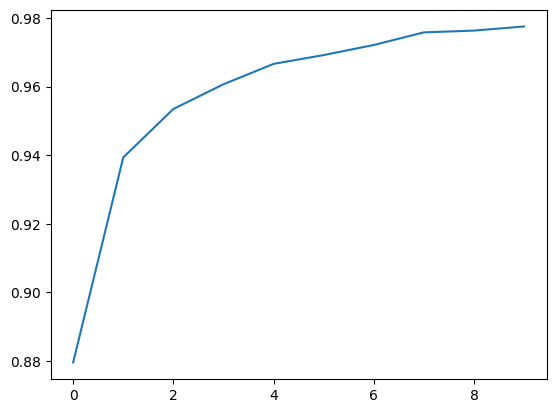

In [5]:
# 编译模型
# 损失函数衡量模型在训练中的表现 然后进行优化
model.compile(
    optimizer = 'adam',
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)
# 训练模型
from keras.utils import to_categorical
history=model.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 10,  #要训​​练的整个数据集的迭代次数
    batch_size = 64  #每个梯度更新的样本数以进行训练

)

print(history.history.keys())
# print(plt.plot(history.history['loss']))
print(plt.plot(history.history['accuracy']))


In [6]:
# 评估模型
model.evaluate(
    test_images,
    to_categorical(test_labels)
)


313/313 [==============================] - 1s 3ms/step - loss: 0.1050 - accuracy: 0.9652


[0.10503138601779938, 0.9652000069618225]

In [7]:
# 保存模型
# 预测前五个图片


predictions = model.predict(test_images[:5])
# 输出模型预测 同时和标准值进行比较
print(np.argmax(predictions, axis = 1))
print(test_labels[:5])


1/1 [==============================] - 0s 71ms/step
[7 2 1 0 4]
[7 2 1 0 4]


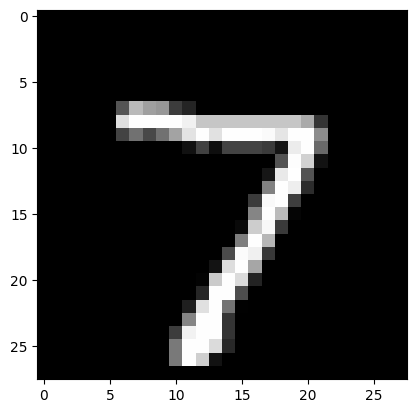

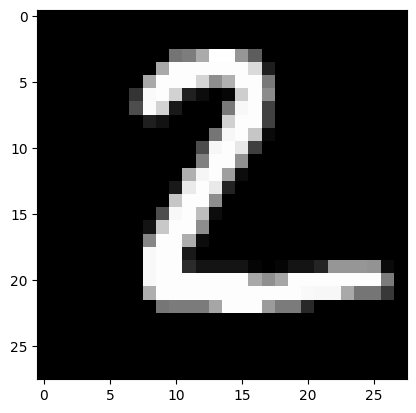

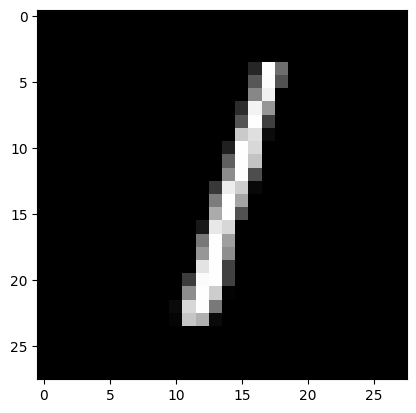

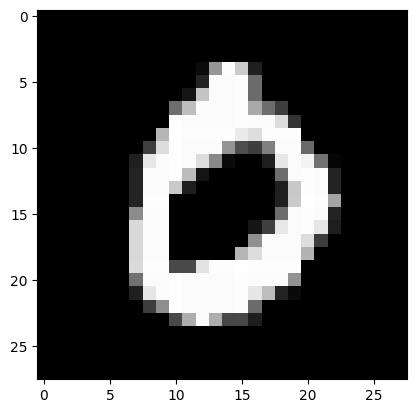

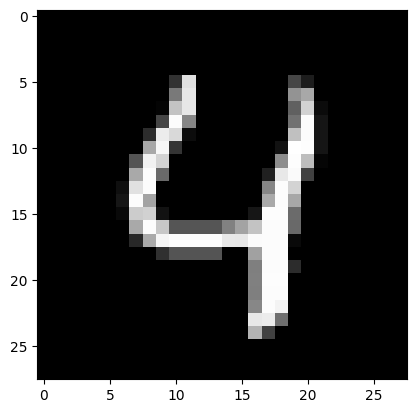

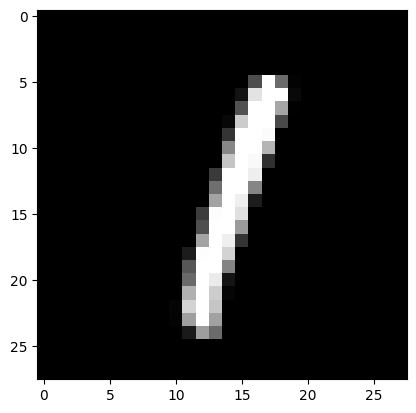

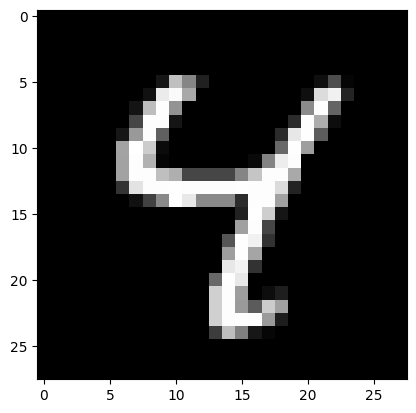

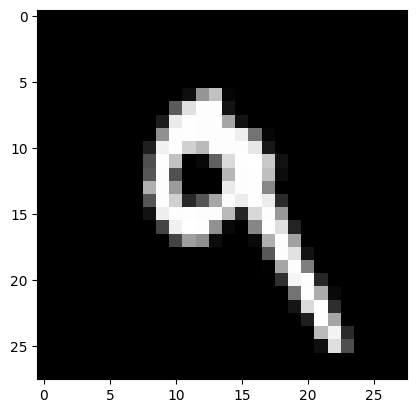

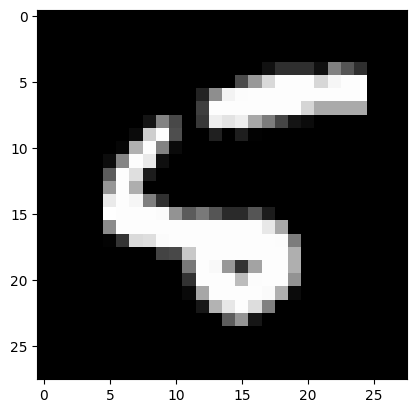

In [8]:
for i in range(0,9):
  first_image = test_images[i]
  first_image = np.array(first_image ,dtype= "float")
  pixels = first_image.reshape((28 ,28))
  plt.imshow(pixels , cmap="gray")
  plt.show()


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/人工智慧"

os.chdir(path)
os.listdir(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['2023AI4.png', '2023AI7.png', '2023AI1.png', '2023AI6.png', '2023AI8.png']

In [17]:
from PIL import Image
import numpy as np
import os

img = Image.open("2023AI4.png").convert("1")
img = np.resize(img, (28,28,1))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,784)
y_pred = model.predict(im2arr)
print(np.argmax(y_pred, axis = 1))


1/1 [==============================] - 0s 21ms/step
[3]
